/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.5154 - loss: 0.6785 - val_accuracy: 0.6000 - val_loss: 0.6582
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5419 - loss: 0.6640 - val_accuracy: 0.6250 - val_loss: 0.6420
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5326 - loss: 0.6558 - val_accuracy: 0.6438 - val_loss: 0.6286
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5639 - loss: 0.6426 - val_accuracy: 0.6500 - val_loss: 0.6171
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6095 - loss: 0.6284 - val_accuracy: 0.6625 - val_loss: 0.6056
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6439 - loss: 0.6195 - val_accuracy: 0.6750 - val_loss: 0.5953
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6620 - loss: 0.6068 - val_accuracy: 0.6750 - val_loss: 0.5845
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6901 - loss: 0.5911 - val_accuracy: 0.7000 - val_loss

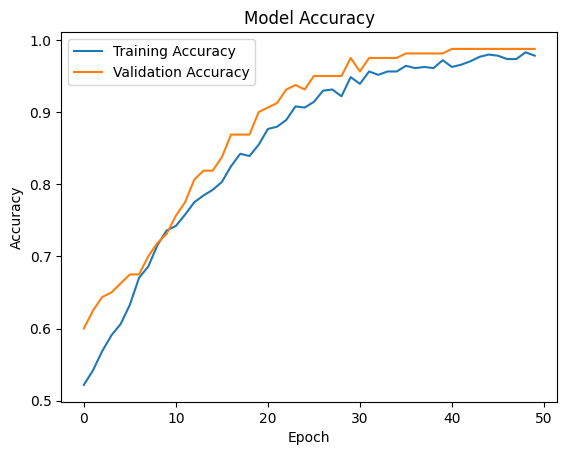

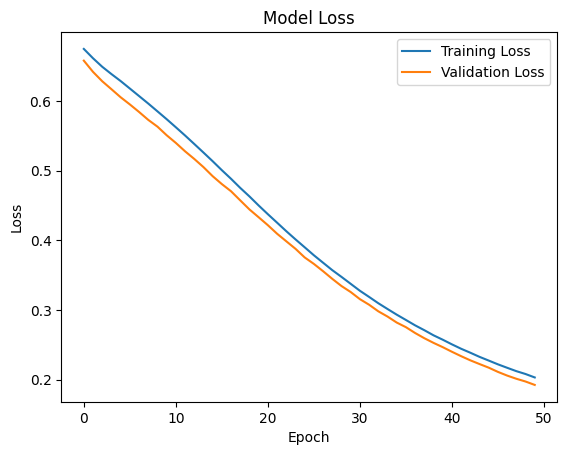

In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Generate synthetic dataset
# Using random data for a binary classification task
np.random.seed(42)
X = np.random.rand(1000, 2)  # 1000 samples with 2 features
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Target: 1 if sum of features > 1, else 0

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build the neural network model
model = Sequential([
    Dense(4, activation='relu', input_shape=(2,)),  # Input layer with ReLU activation
    Dense(4, activation='relu'),  # Hidden layer with ReLU activation
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Step 4: Compile the model
model.compile(
    optimizer='adam',  # Adaptive Moment Estimation optimizer
    loss='binary_crossentropy',  # Binary cross-entropy loss for classification
    metrics=['accuracy']  # Metric to track during training
)

# Step 5: Train the model
history = model.fit(
    X_train, y_train,  # Training data
    epochs=50,  # Number of training epochs
    batch_size=32,  # Batch size for training
    validation_split=0.2,  # Use 20% of training data for validation
    verbose=1  # Display training progress
)

# Step 6: Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)  # Convert probabilities to binary predictions
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy

# Print evaluation results
print(f"Test Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 7: Visualize training performance
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
